<a href="https://colab.research.google.com/github/yslee0540/boostcourse-datascience/blob/main/4_k_beauty_oversea_online_sale_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/k-beauty-oversea-online-sale-output.ipynb)

## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## 한글폰트 설정
* https://github.com/ychoi-kr/koreanize-matplotlib

In [ ]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서는 아래 모듈을 설치하고 불러와서 사용하세요.

!pip install koreanize-matplotlib

import koreanize_matplotlib

In [ ]:
# os 별로 폰트를 다르게 설정해 줍니다.

# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [ ]:
# %ls data

In [ ]:
from glob import glob

# glob("data/*.csv")

In [ ]:
# df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_202002.csv",
#                      encoding="cp949")
df_raw = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale.csv.zip",
                     encoding="cp949")
df_raw.shape

(450, 27)

In [ ]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

,count
국가(대륙)별,
합계,45
미국,45
중국,45
일본,45
아세안(ASEAN),45
EU,45
중동,45
중남미,45
대양주,45


In [ ]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"]

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,41204,39108,36536,47981,39995,43443,53852,51478
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2071,2657,2951,1818,1483
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,36020,35505,34219,45910,37338,40492,52034,49995
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,696,567,773,854,621,646,934,802
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,791,854,696,567,773,854,621,646,934,802
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,2575,2394,1737,1716,1723,1886,1845,1837,3166,1778
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,2546,2362,1672,1678,1651,1834,1779,1721,3059,1729
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,37,125,175,251,172,269,88,156,118,338


## 분석과 시각화를 위한 tidy data 만들기
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [ ]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4 p)'],
      dtype='object')

In [ ]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], var_name="기간", value_name="백만원")
df.shape

(10800, 5)

In [ ]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


## 데이터 전처리
### 기간에서 연도를 분리하기

In [ ]:
int("2019 4/4 p)".split()[0])

2019

In [ ]:
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))

In [ ]:
df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [ ]:
df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


### 필요없는 데이터 제거하기

In [ ]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
# df["국가(대륙)별"] != "합계"
# df["상품군별"] != "합계"
# df["판매유형별"] != "계"
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [ ]:
df.isnull().sum()

,0
국가(대륙)별,0
상품군별,0
판매유형별,0
기간,0
백만원,3024
연도,0
분기,0


## K-Beauty 시각화
### 전체 상품군 판매액

In [ ]:
df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


<Axes: xlabel='연도', ylabel='백만원'>

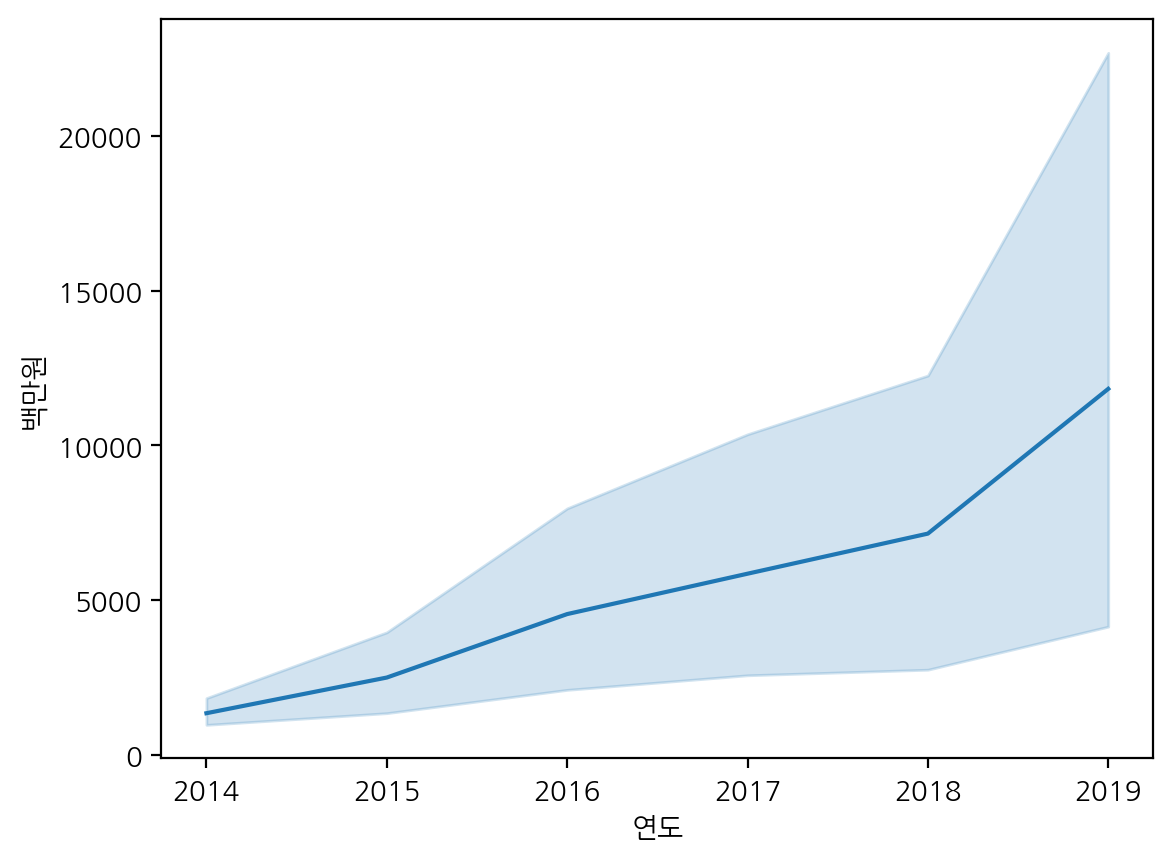

In [ ]:
sns.lineplot(data=df_total, x="연도", y="백만원")

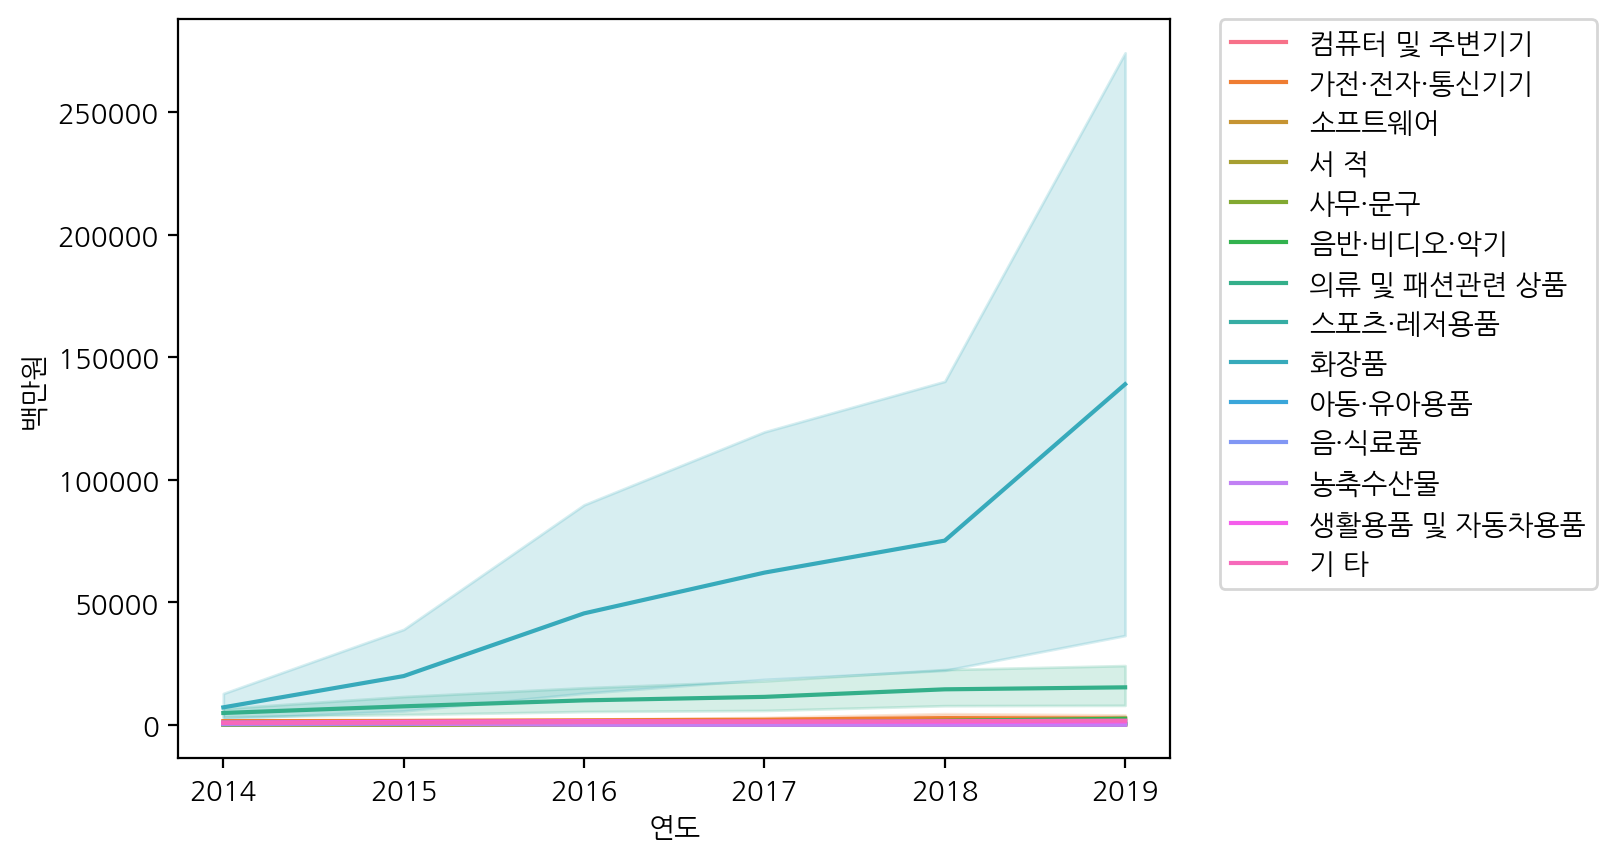

In [ ]:
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<Figure size 1500x400 with 0 Axes>

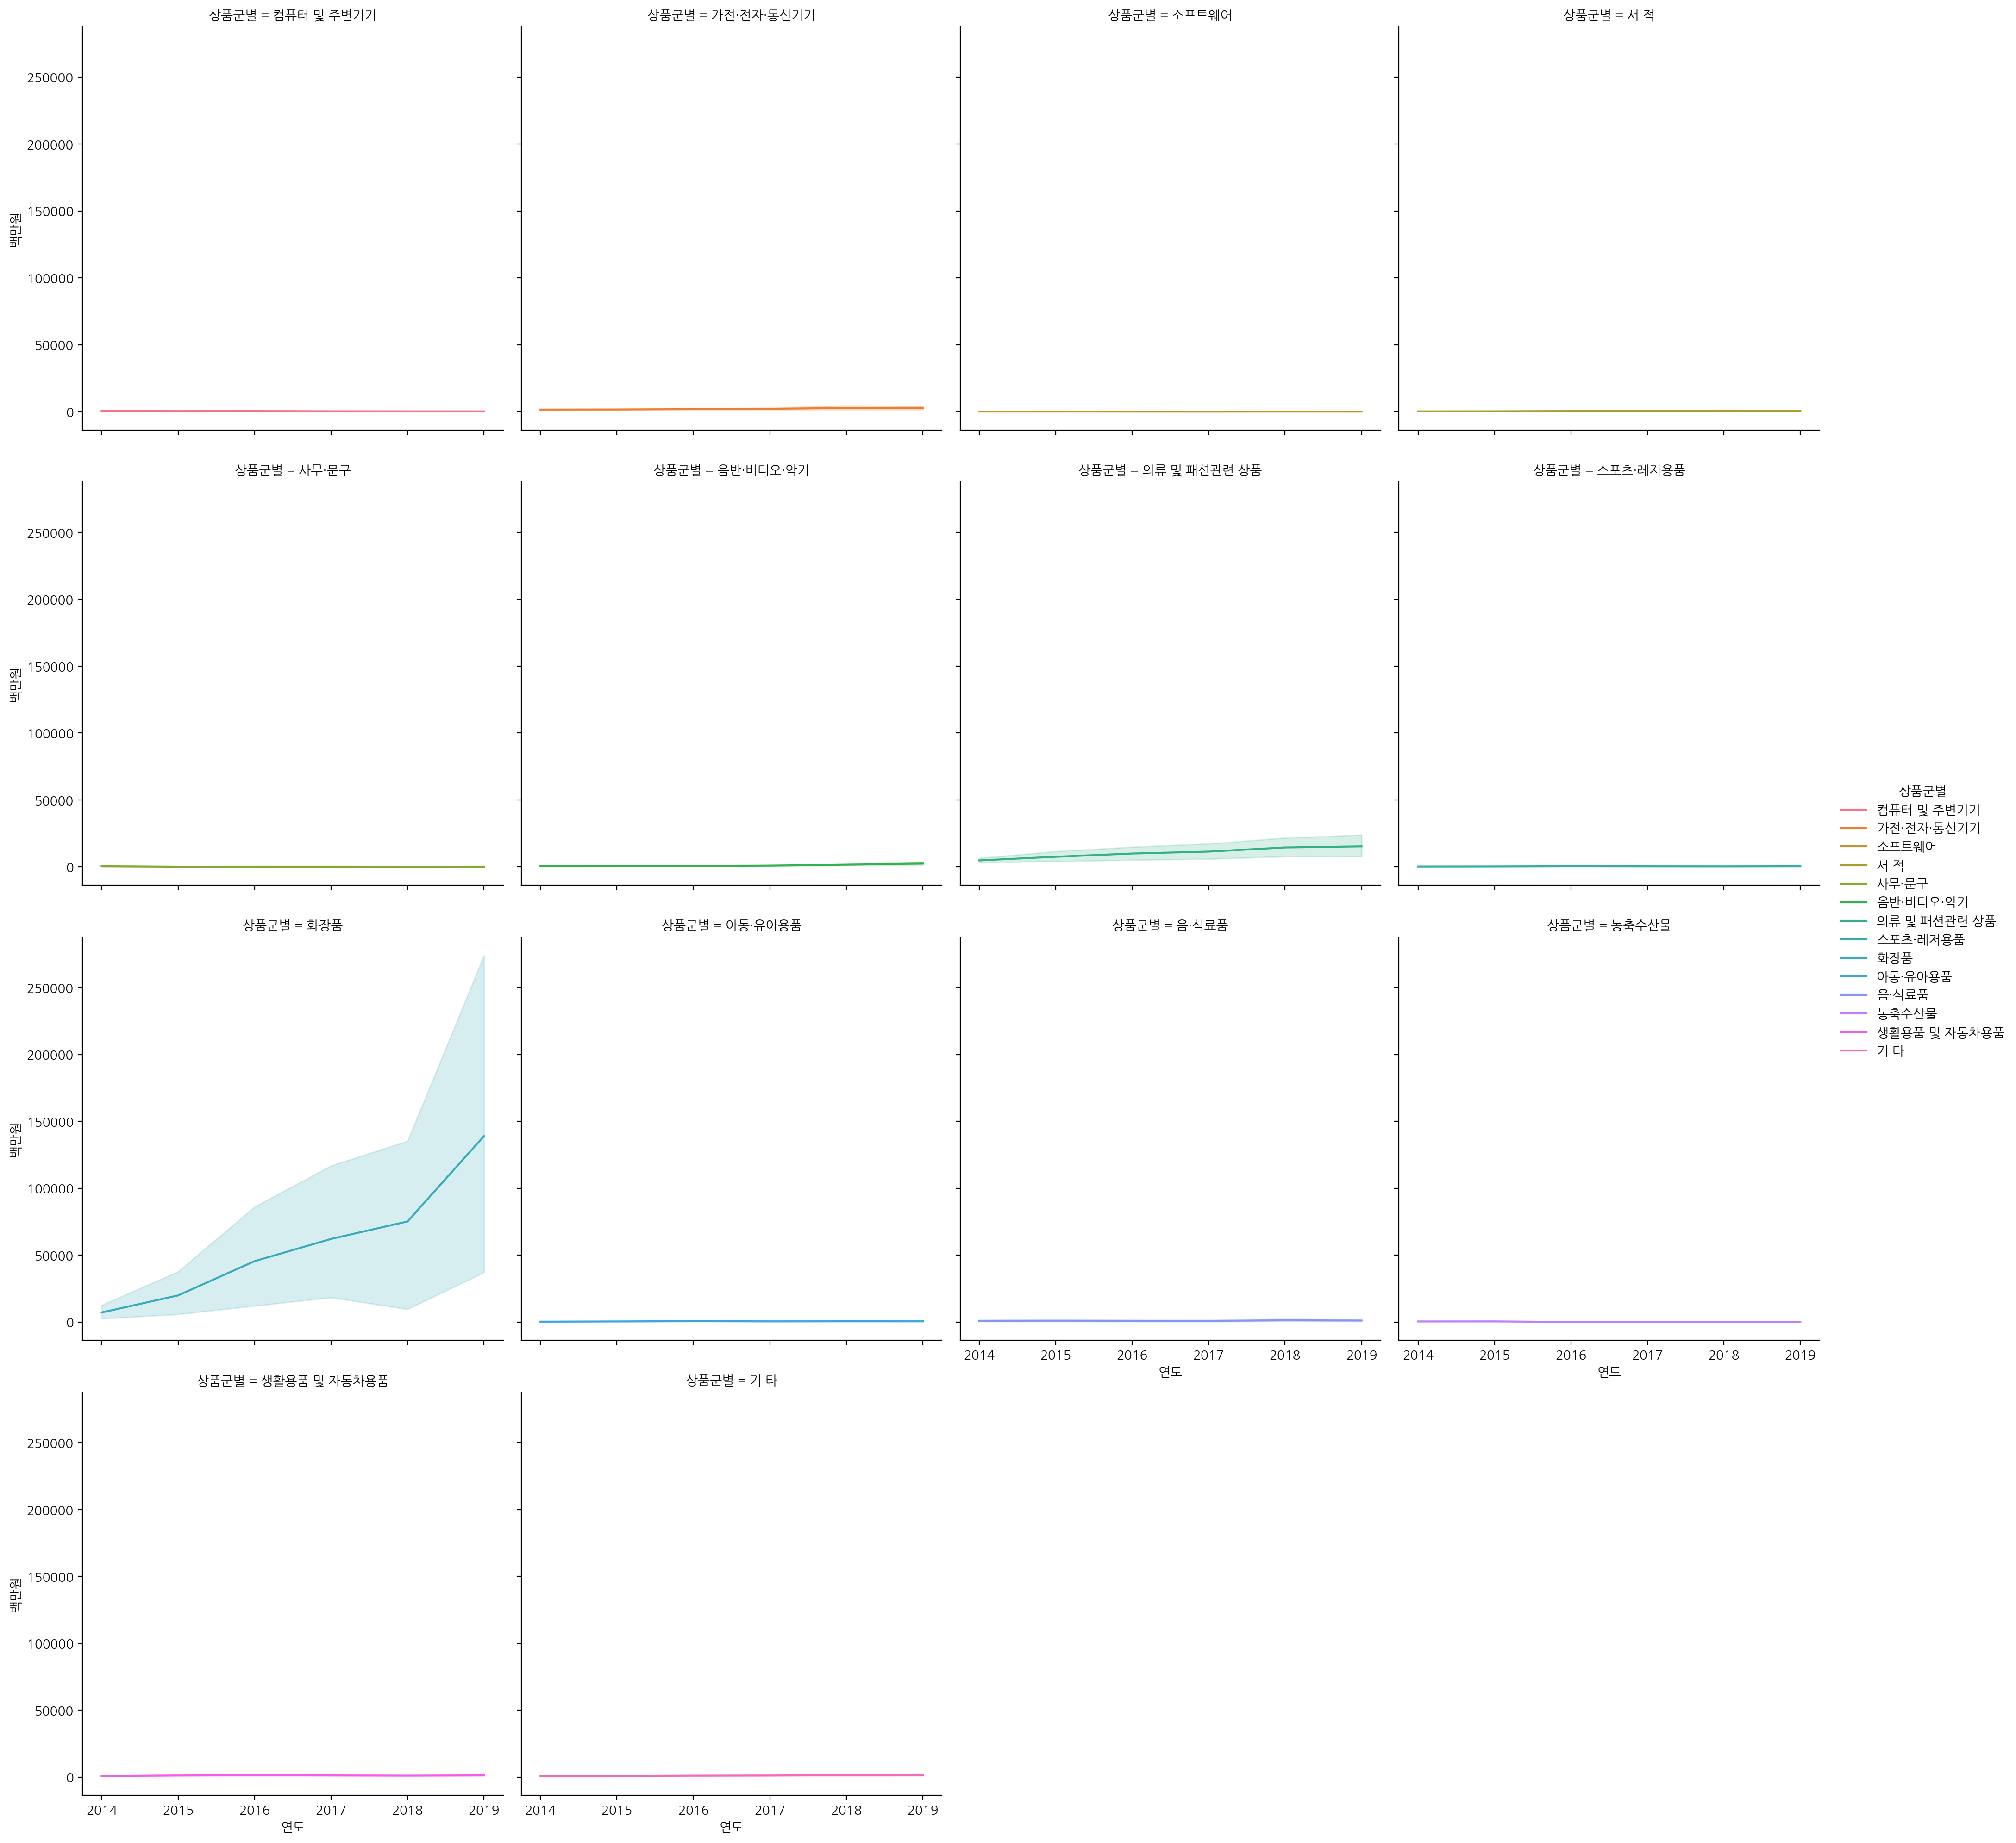

In [ ]:
sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=4)

In [ ]:
df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션관련 상품"])].copy()

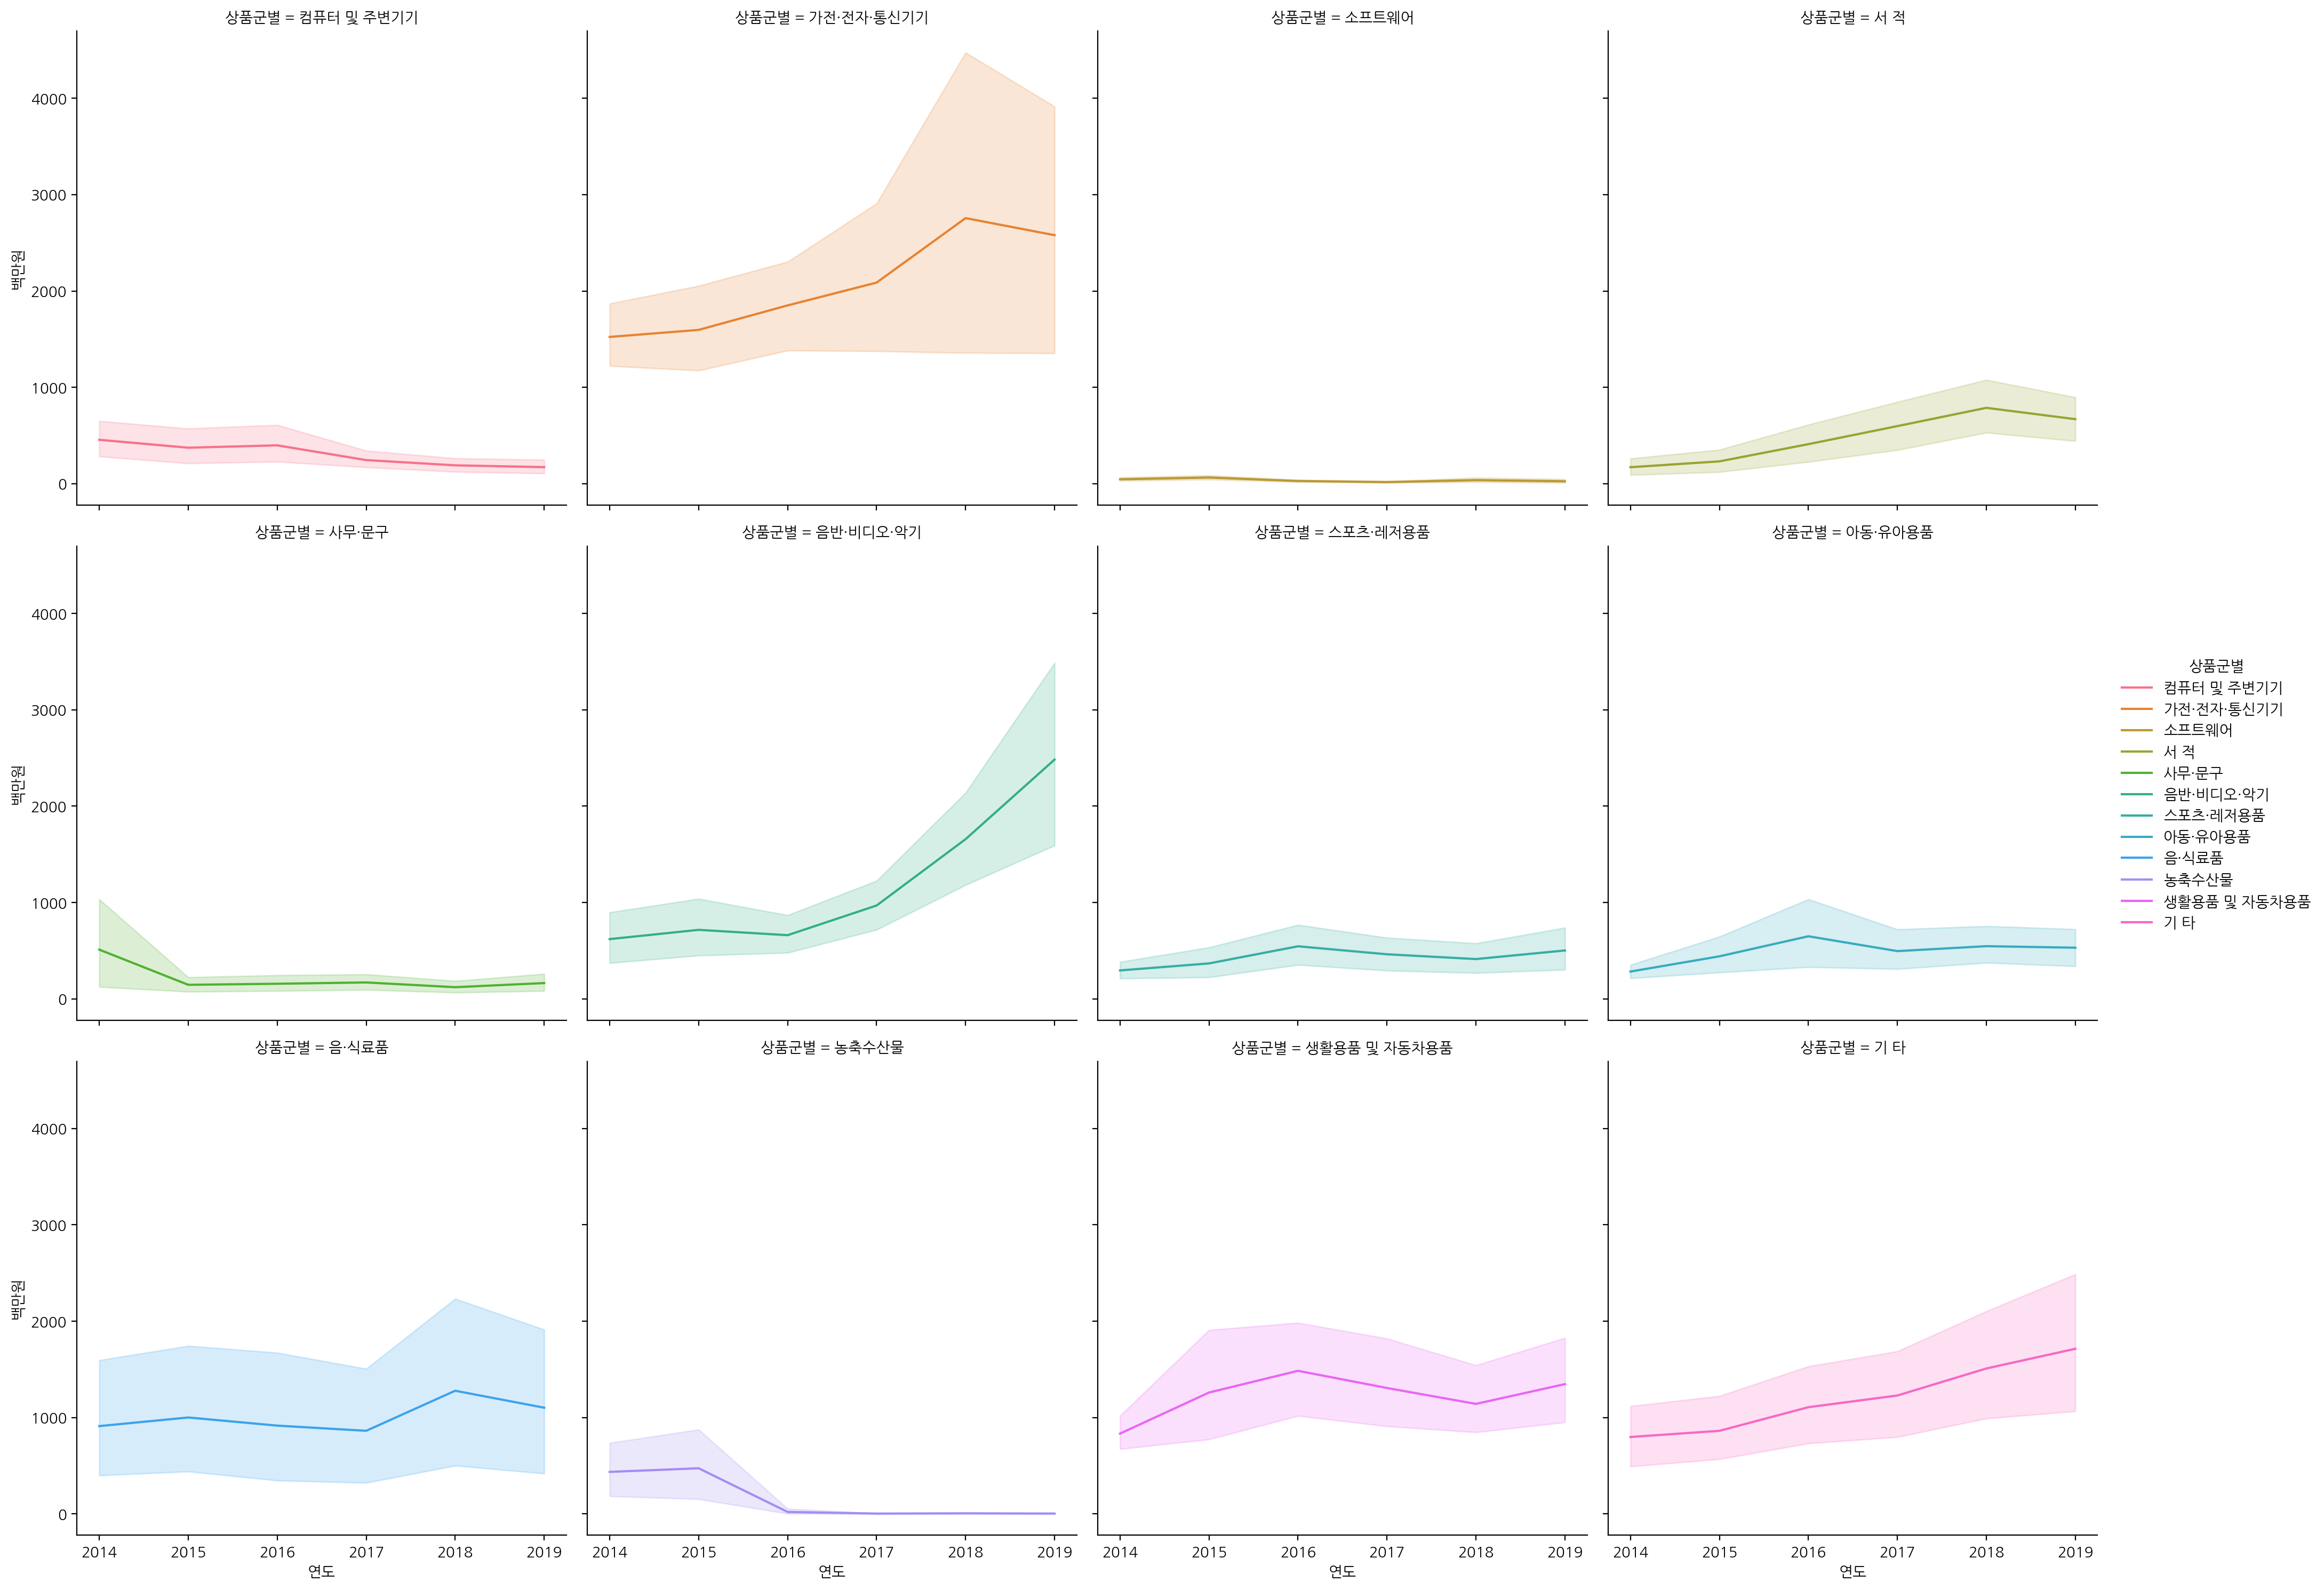

In [ ]:
sns.relplot(data=df_sub, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=4)

### 화장품의 온라인쇼핑 해외직접판매액

In [ ]:
df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

<Axes: xlabel='연도', ylabel='백만원'>

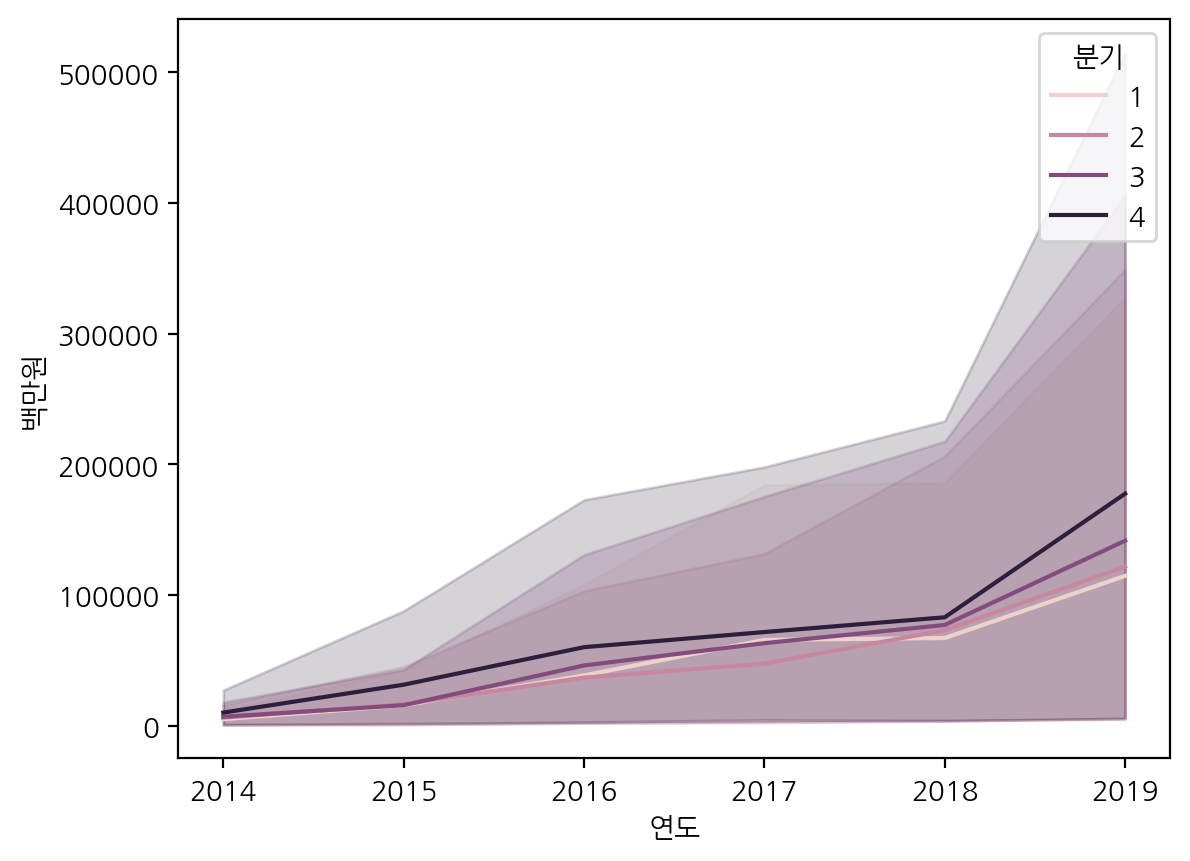

In [ ]:
sns.lineplot(data=df_cosmetic, x="연도", y="백만원", hue="분기")

<Axes: xlabel='기간', ylabel='백만원'>

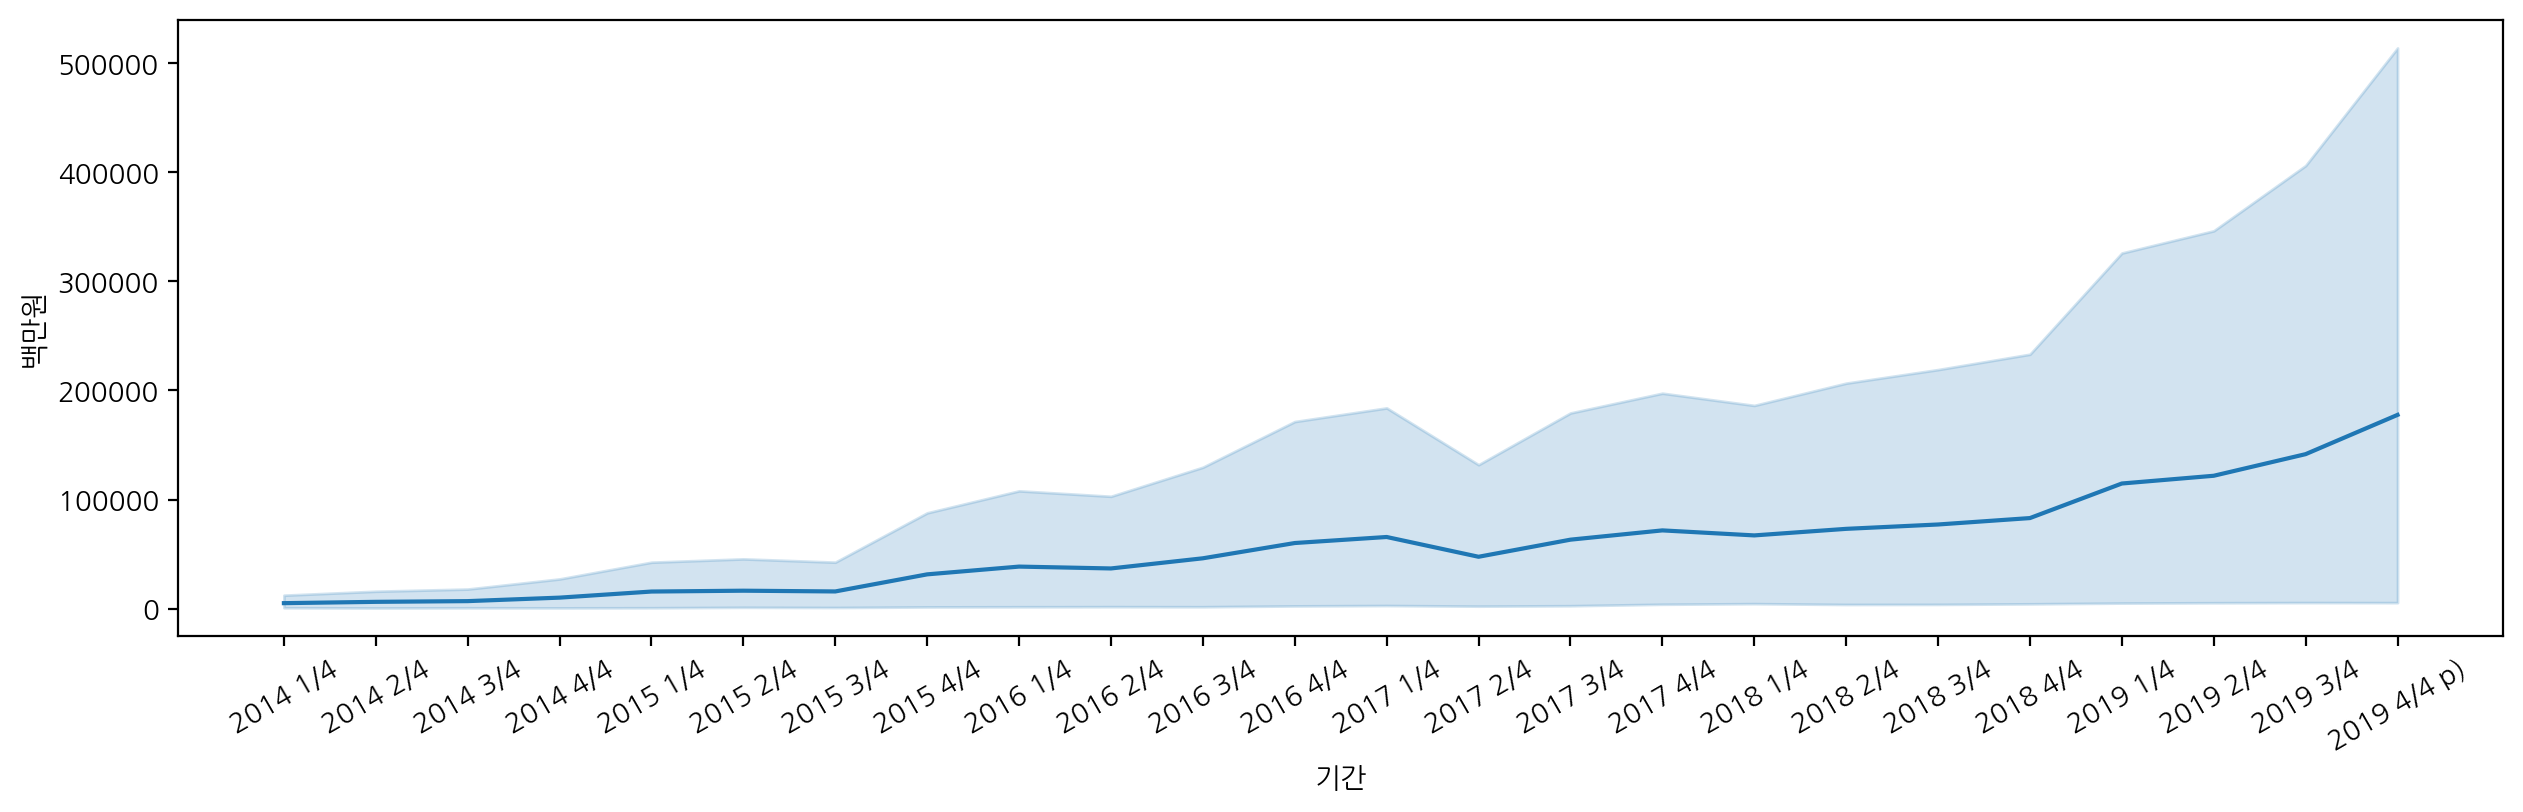

In [ ]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

<Axes: xlabel='기간', ylabel='백만원'>

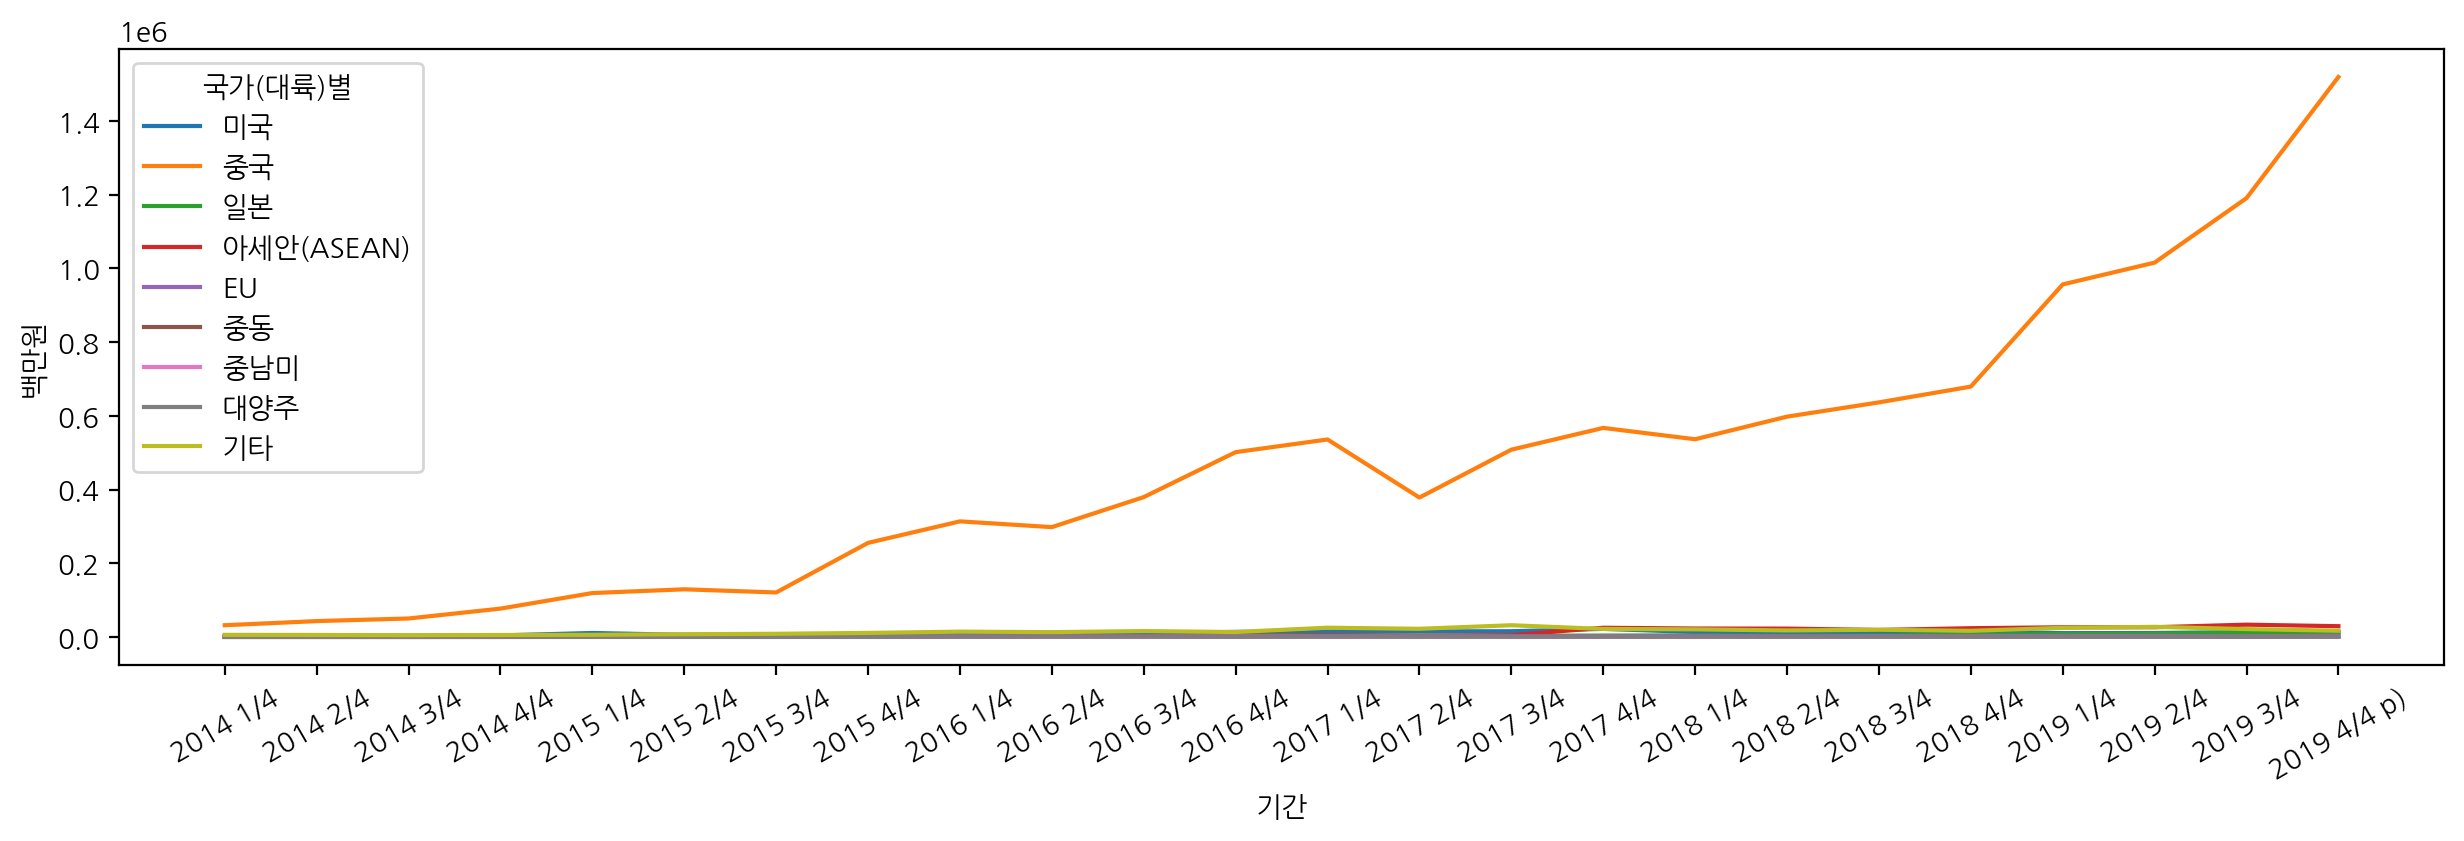

In [ ]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

<Axes: xlabel='기간', ylabel='백만원'>

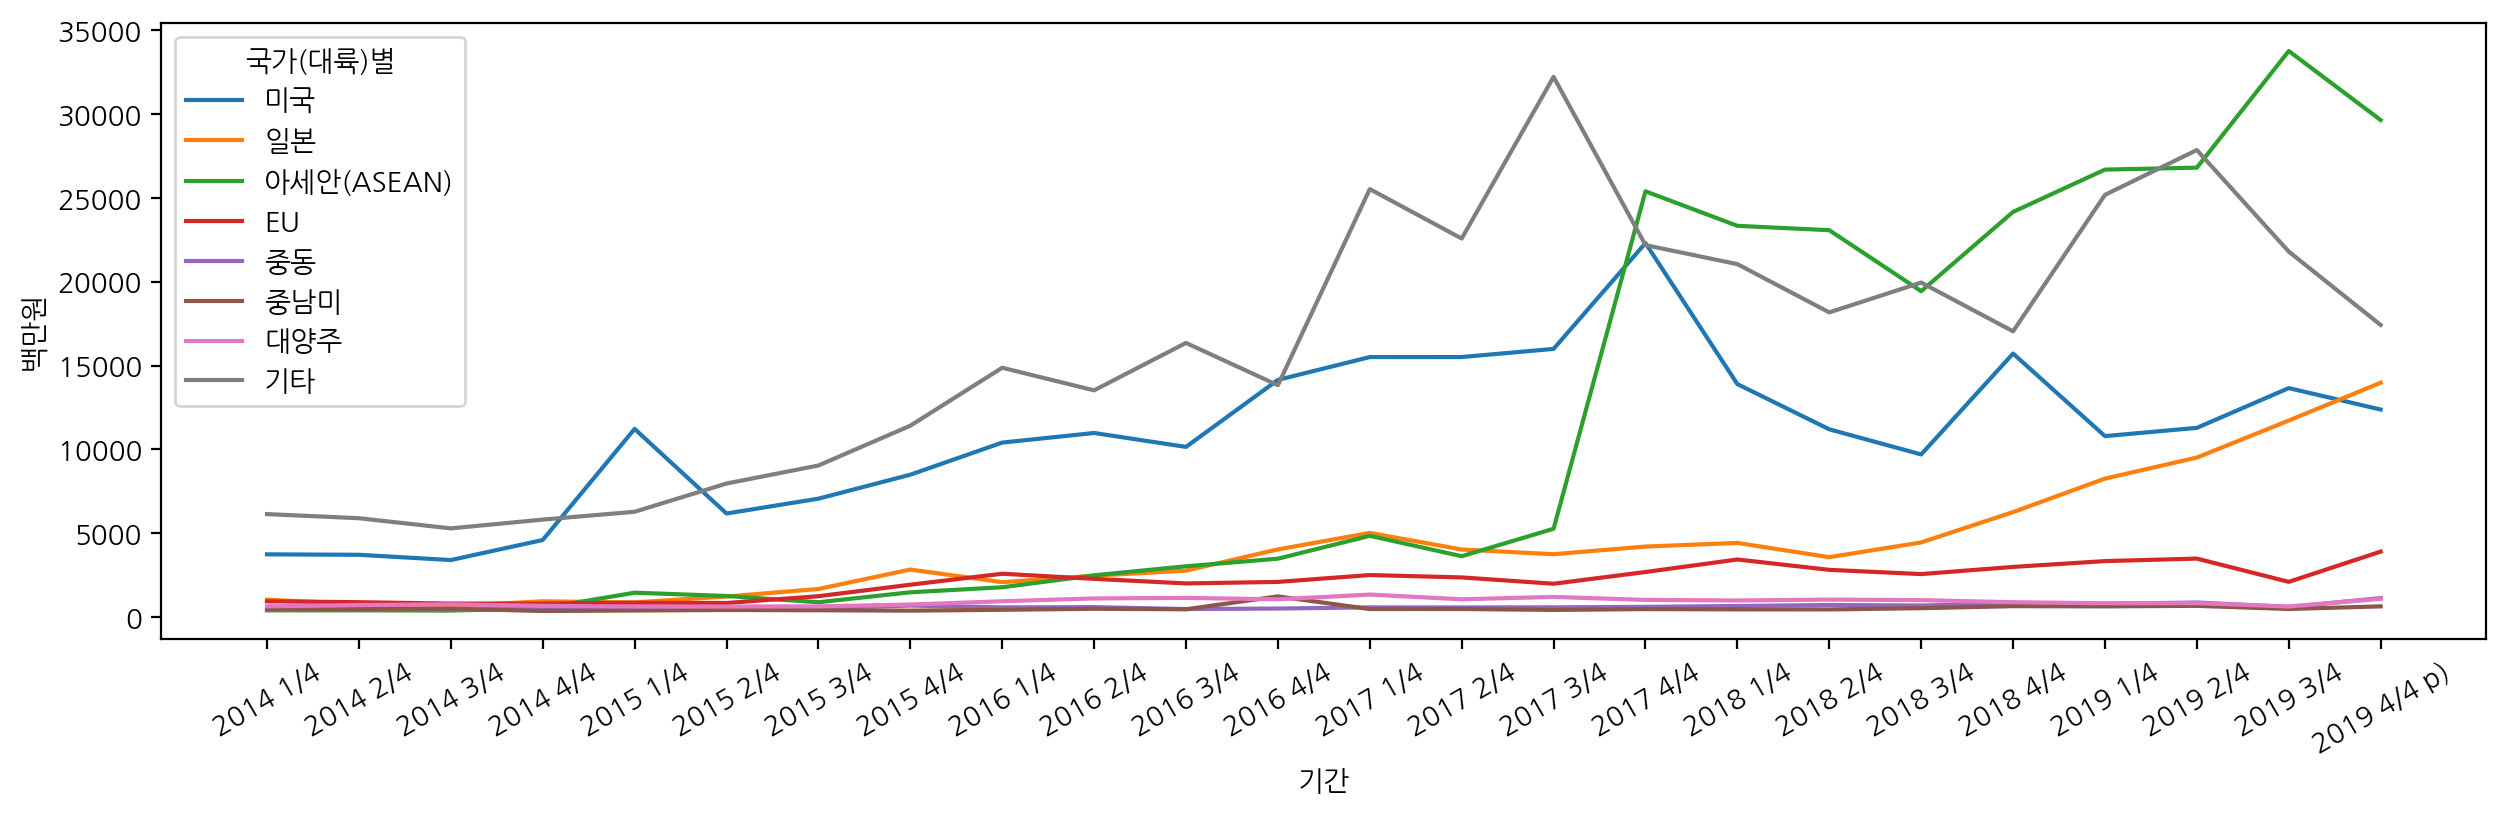

In [ ]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x="기간", y="백만원", hue="국가(대륙)별")

<Axes: xlabel='기간', ylabel='백만원'>

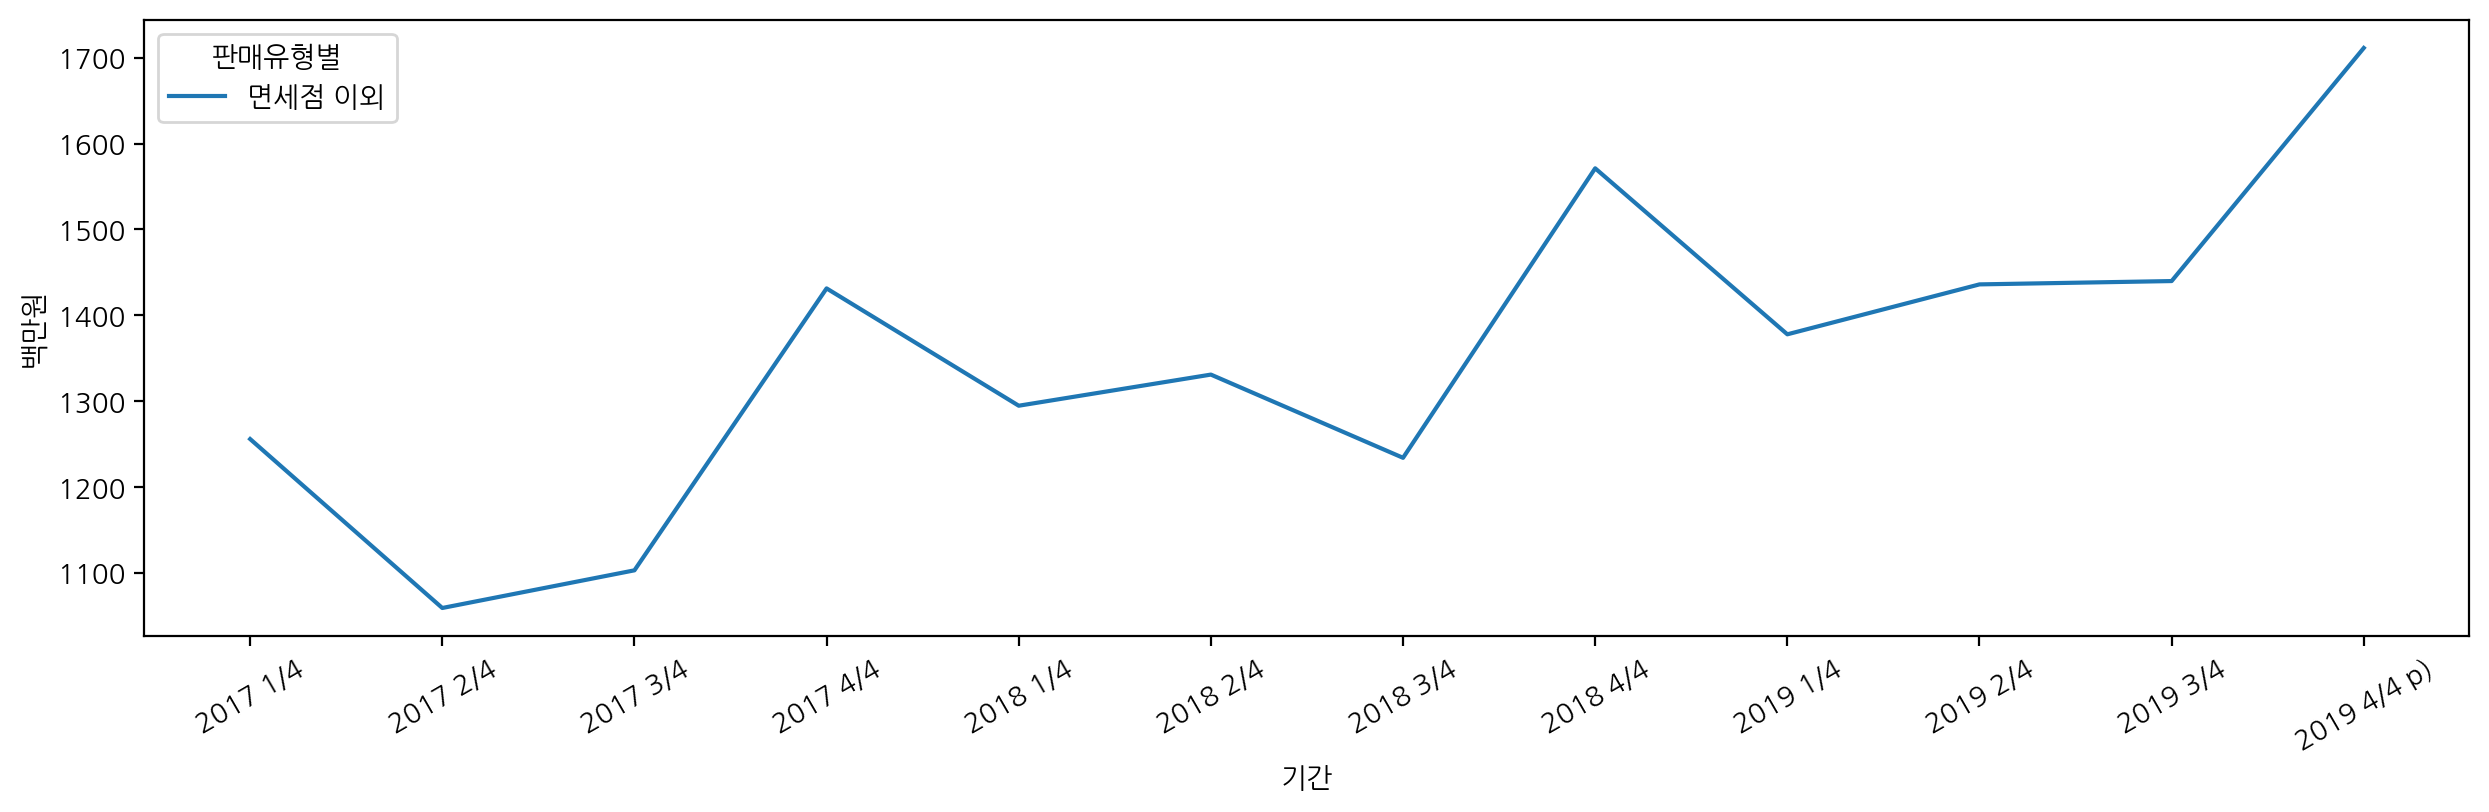

In [ ]:
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별", errorbar=None)

### 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [ ]:
df_fashion = df[(df["상품군별"] == "의류 및 패션관련 상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션관련 상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션관련 상품,계,2014 1/4,3473.0,2014,1
246,EU,의류 및 패션관련 상품,계,2014 1/4,1364.0,2014,1


<Axes: xlabel='기간', ylabel='백만원'>

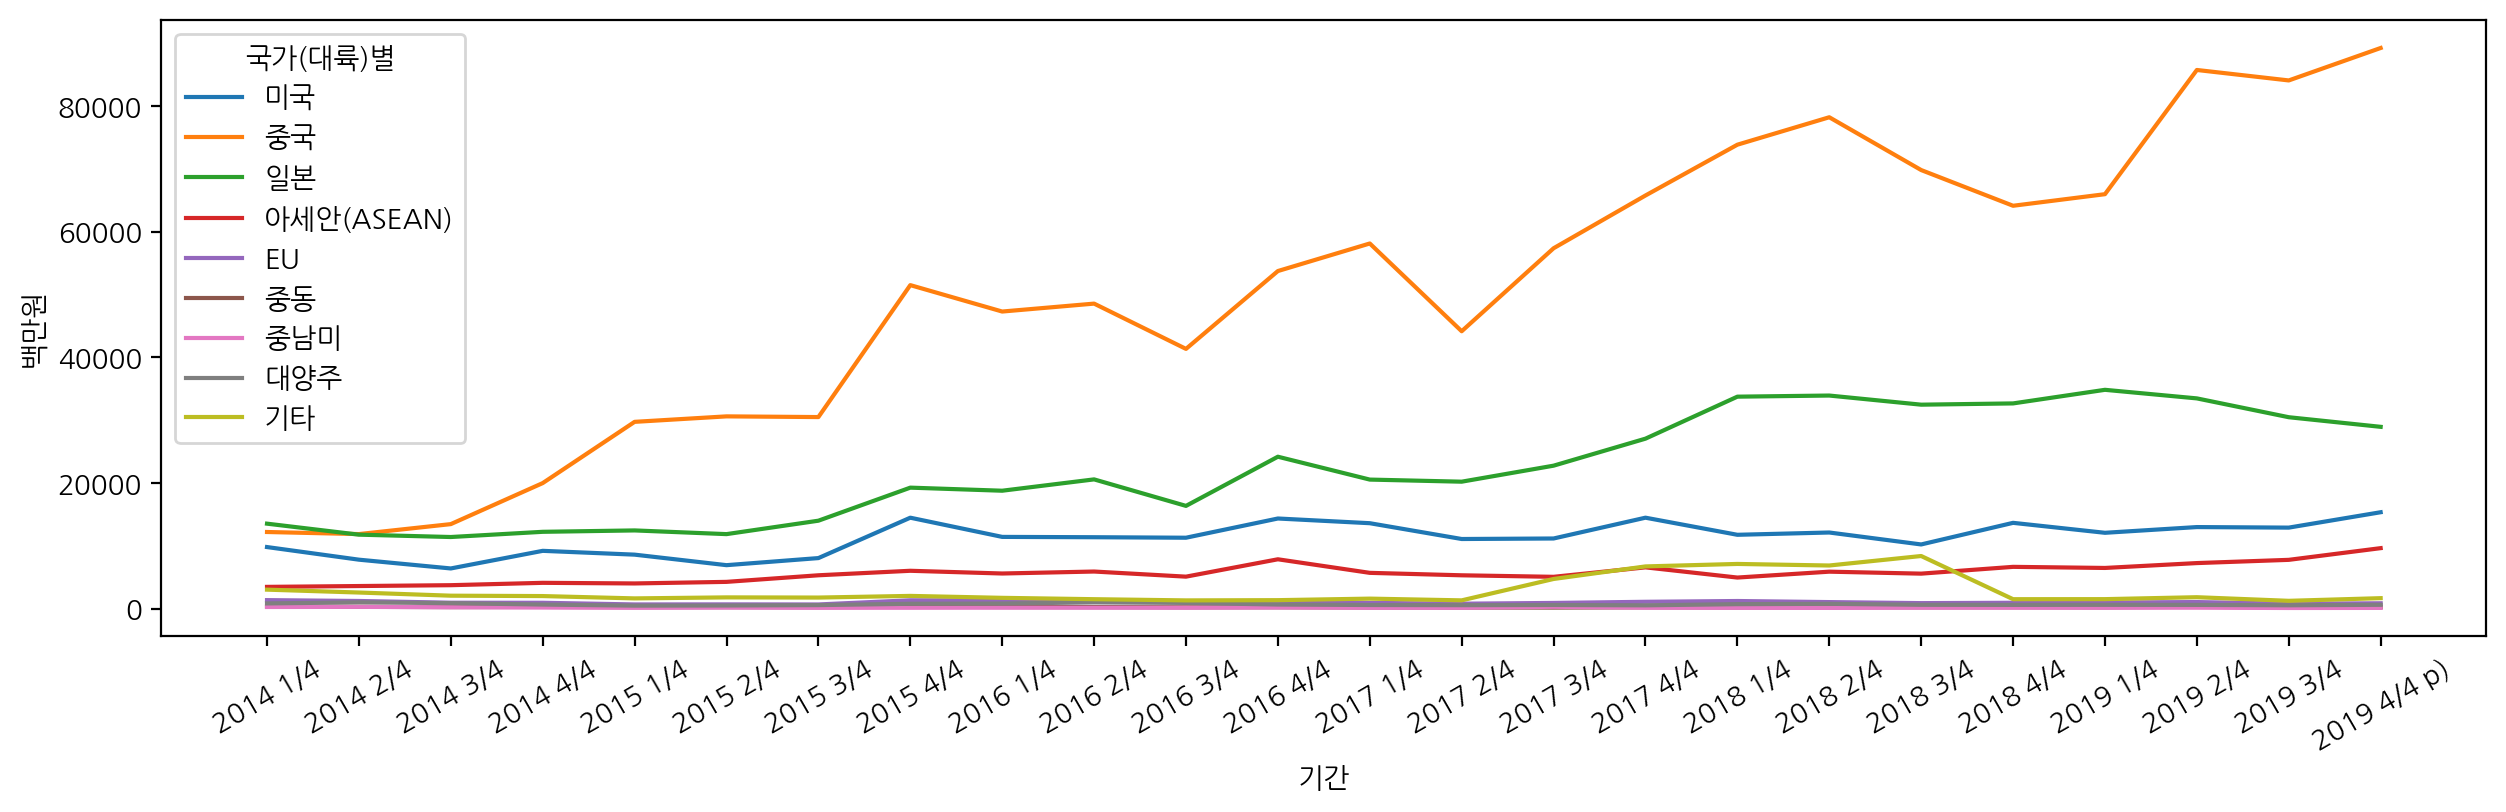

In [ ]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

<Axes: xlabel='기간', ylabel='백만원'>

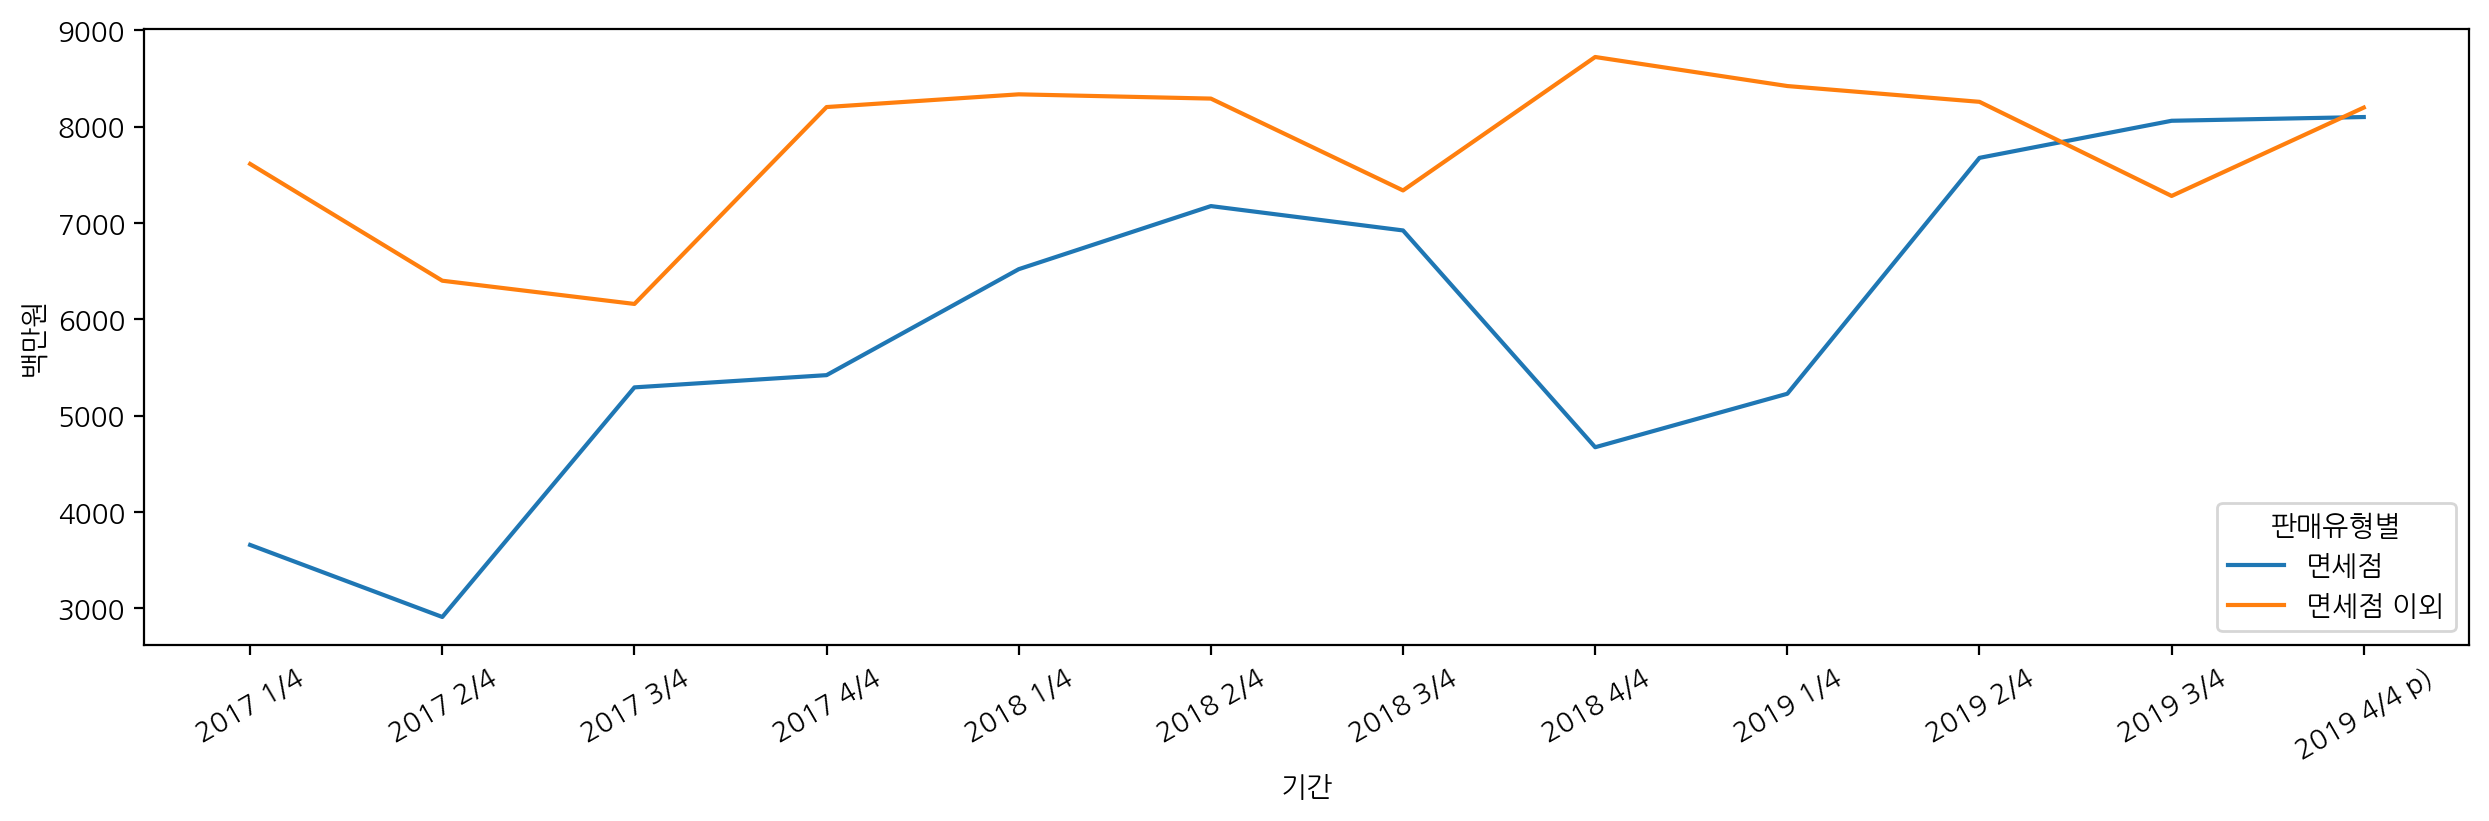

In [ ]:
df_fashion2 = df[(df["상품군별"] == "의류 및 패션관련 상품") & (df["판매유형별"] != "계")].copy()
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", errorbar=None)

### 데이터 집계하기

In [ ]:
result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
EU,4485.0,3374.0,4899.0,3736.0,4102.0,3695.0
기타,9683.0,7248.0,5918.0,14387.0,23893.0,6275.0
대양주,3392.0,2349.0,3401.0,2266.0,2721.0,2381.0
미국,33223.0,38066.0,48451.0,50353.0,47774.0,53324.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23086.0,31155.0
일본,48960.0,57594.0,79905.0,90584.0,132808.0,127722.0
중국,57531.0,142339.0,190932.0,225407.0,285998.0,325018.0
중남미,975.0,616.0,649.0,762.0,576.0,543.0
중동,1172.0,1018.0,968.0,772.0,879.0,924.0


### 연산결과를 시각적으로 보기

<Axes: xlabel='연도', ylabel='국가(대륙)별'>

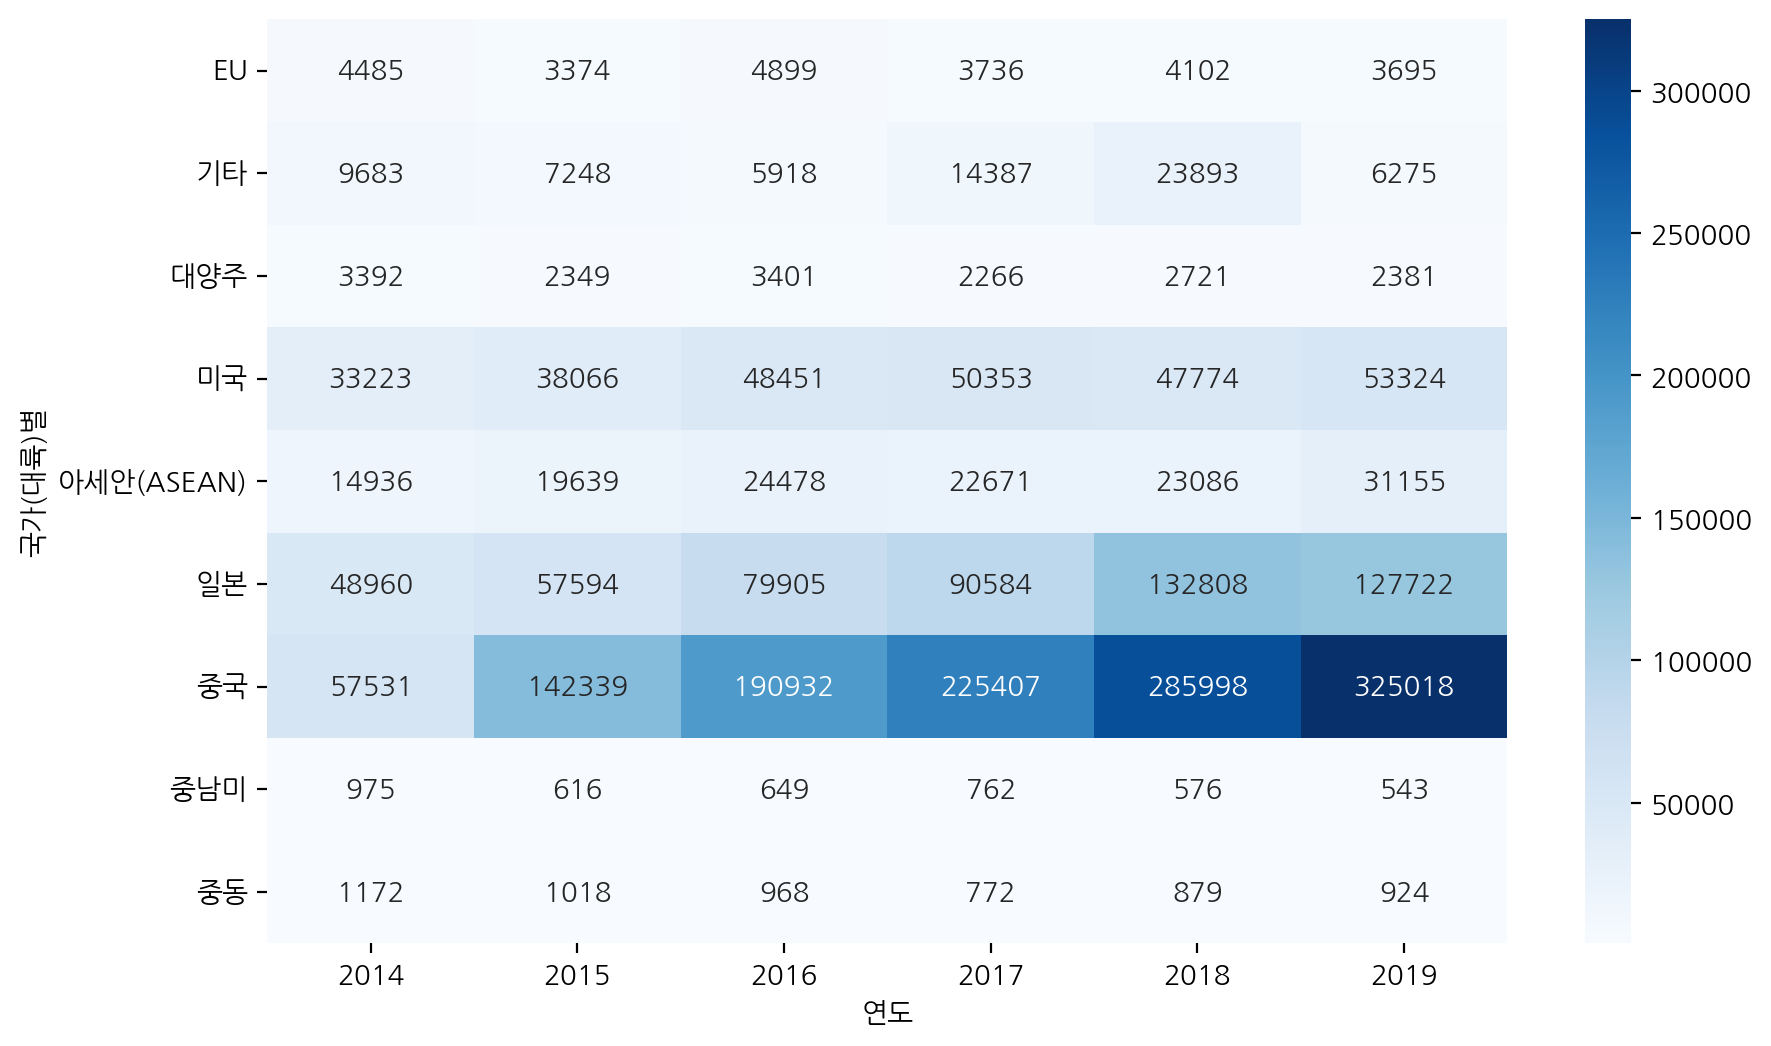

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap="Blues", annot=True, fmt=".0f")

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

<Axes: xlabel='연도', ylabel='백만원'>

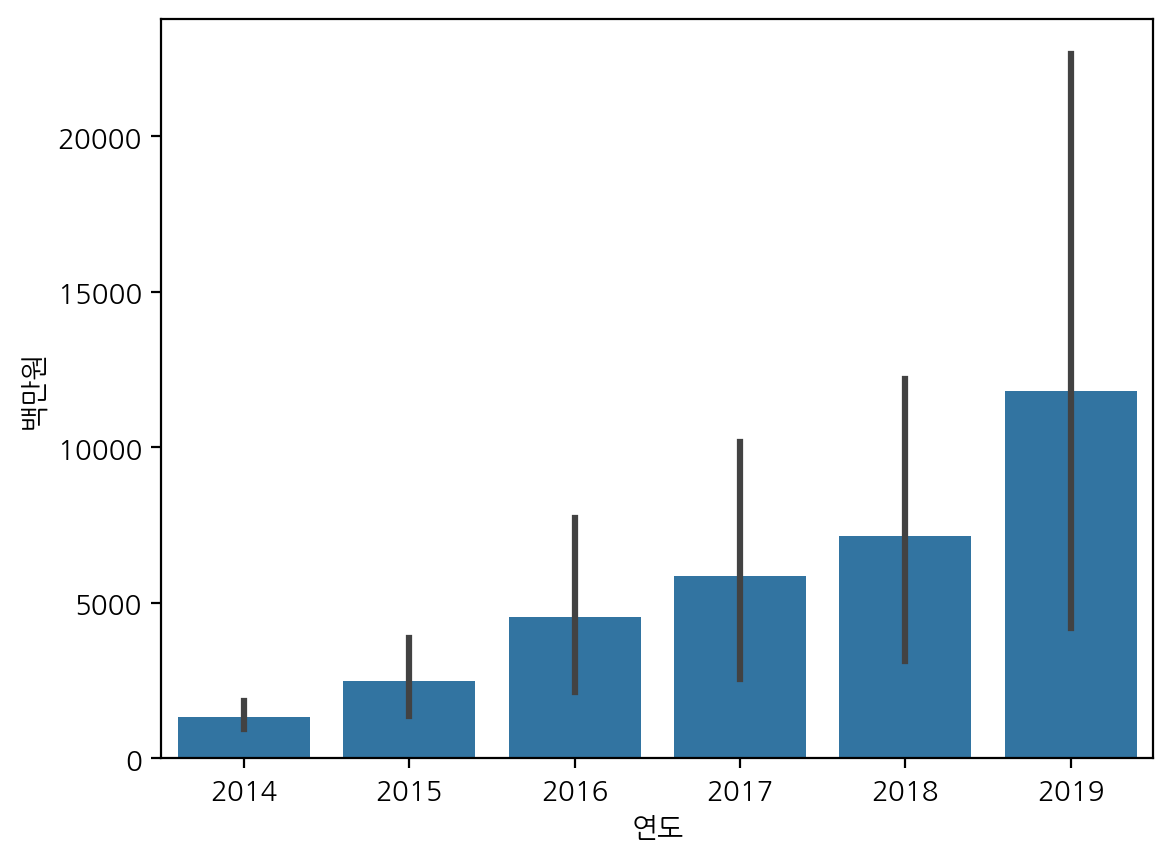

In [ ]:
sns.barplot(data=df_total, x="연도", y="백만원")

<Axes: xlabel='연도', ylabel='백만원'>

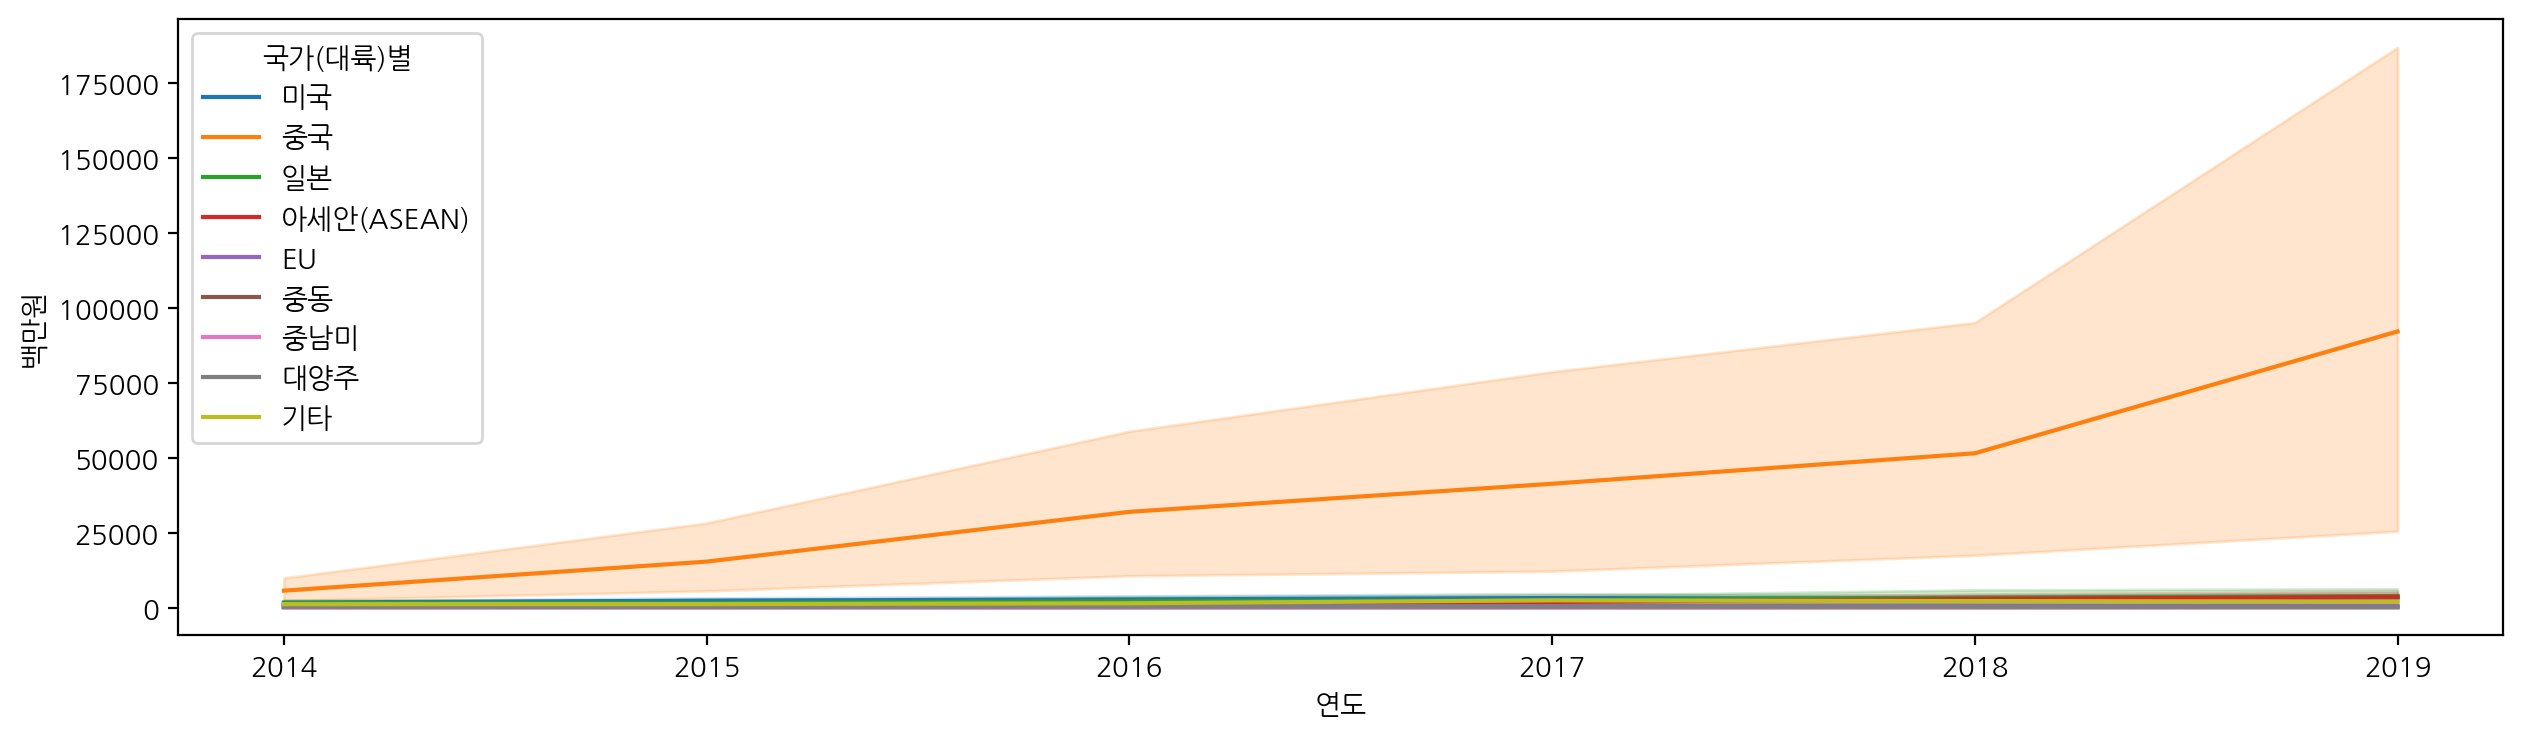

In [ ]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

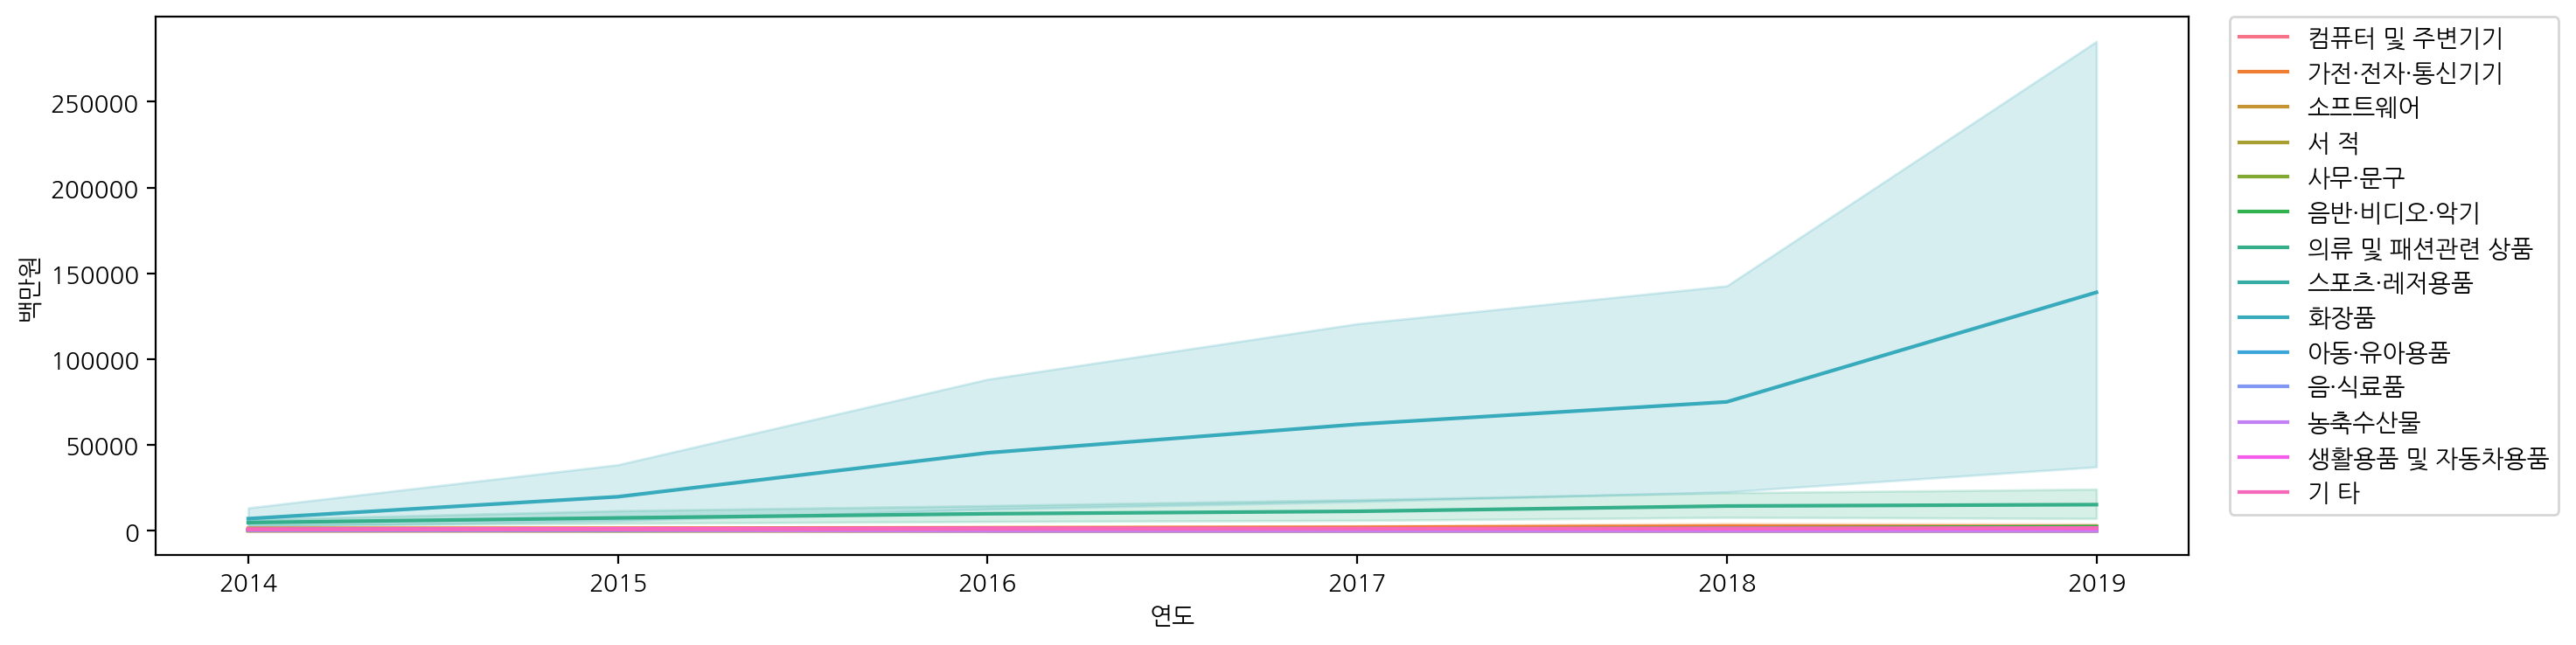

In [ ]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)